## Task 1: Import the Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error 
import numpy as np 

## Task 2: Load the Dataset

In [6]:
housing = pd.read_csv("Analysis_StatModels/data/housing.csv")

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Task 3: Explore the Dataset

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Task 4: Explore the Variables 

In [9]:
housing.iloc[:, :-1].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


## Task 5: Check for Null Values 

In [10]:
print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [11]:
housing = housing.dropna()

In [12]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Task 6: Prepare the Data

In [13]:
housing = pd.get_dummies(housing)
housing = housing.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 8]]
housing.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False,342200.0


## Task 7: Create the Dependent Variable  

In [14]:
y = housing.iloc[:,-1]
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

## Task 8: Create the Independent Variable 

In [15]:
X = housing.iloc[:,:-1]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False


## Task 9: Split the Data with Scikit-learn

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=29)

## Task 10: Train and Fit the Model

In [17]:
X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_new.astype('float') ).fit()

## Task 11: Run Summary and Interpret the Findings

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2321.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        19:12:13   Log-Likelihood:            -1.9245e+05
No. Observations:               15324   AIC:                         3.849e+05
Df Residuals:                   15311   BIC:                         3.850e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.785e+06    8.5e+04    -21.016      0.000   -1.95e+06   -1.62e+06
longitude                  -2.544e+04   1174.989    -21.650      0.000   -2.77e+04   -2.31e+04
latitude                   -2.396e+04   1155.298    -20.743      0.000   -2.62e+04   -2.17e+04
housing_median_age          1052.1075     50.818     20.704      0.000     952.498    1151.717
total_rooms                   -6.5136      0.922     -7.066      0.000      -8.321      -4.707
total_bedrooms               101.7169      7.895     12.883      0.000      86.241     117.193
population                   -36.7659      1.237    -29.726      0.000     -39.190     -34.342
households                    45.9564      8.560      5.369      0.000      29.177      62.736
median_income               3.909e+04    386.275    101.205      0.000    3.83e+04    3.98e+04
ocean_proximity_<1H OCEAN  -3.719e+05   1.81e+04    -20.545      0.000   -4.07e+05   -3.36e+05
ocean_proximity_INLAND     -4.138e+05    1.7e+04    -24.298      0.000   -4.47e+05    -3.8e+05
ocean_proximity_ISLAND     -2.572e+05   3.76e+04     -6.841      0.000   -3.31e+05   -1.84e+05
ocean_proximity_NEAR BAY   -3.745e+05   1.86e+04    -20.111      0.000   -4.11e+05   -3.38e+05
ocean_proximity_NEAR OCEAN  -3.68e+05   1.85e+04    -19.889      0.000   -4.04e+05   -3.32e+05
==============================================================================
Omnibus:                     3913.705   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15465.598
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       7.271   Cond. No.                     2.45e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.91e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Task 12 :  Plot the Findings

Text(0.5, 1.0, 'Linear correlation median_income / median house value')

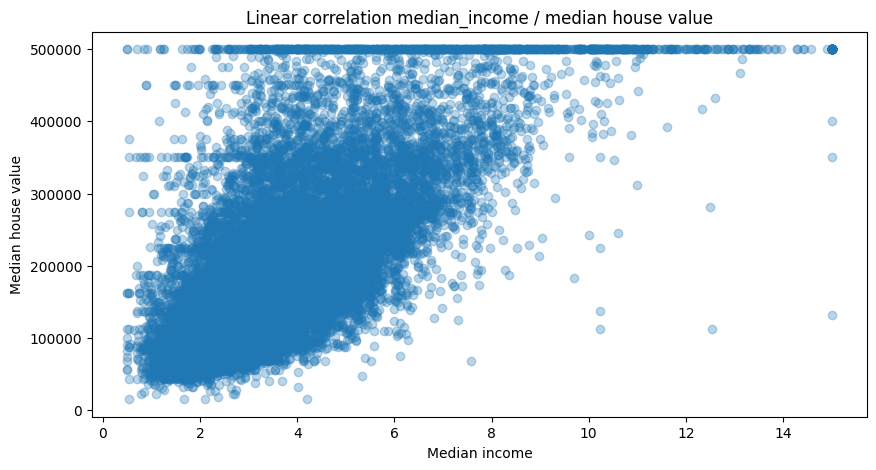

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(housing["median_income"], housing["median_house_value"], alpha=0.3)
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.title('Linear correlation median_income / median house value')


In [20]:
X_test_new = sm.add_constant(X_test)
predictions = model.predict(X_test_new)

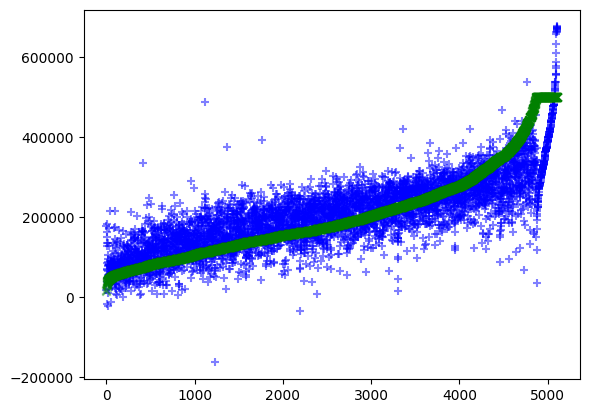

In [21]:
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : predictions})
df.sort_values(by=['Y_test', 'Y_pred'], inplace=True, ignore_index=True)
df['idx'] = range(len(df))
plt.scatter(df.idx, df.Y_pred, c="blue", alpha=0.5, marker="+")
plt.scatter(df.idx, df.Y_test, c="green", alpha=0.4, marker="x")
plt.show()

In [22]:
mean_squared_error(y_test, predictions, multioutput='raw_values')

array([4.61984916e+09])

# End